<a href="https://colab.research.google.com/github/SarmenSinanian/DS-Unit-2-Applied-Modeling/blob/master/Sarmen_Sinanian_assignment_applied_modeling_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 2

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Plot the distribution of your target. 
    - Regression problem: Is your target skewed? Then, log-transform it.
    - Classification: Are your classes imbalanced? Then, don't use just accuracy. And try `class_balance` parameter in scikit-learn.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline?
- [ ] Share at least 1 visualization on Slack.

You need to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.


## Reading

### Today
- [imbalance-learn](https://github.com/scikit-learn-contrib/imbalanced-learn)
- [Learning from Imbalanced Classes](https://www.svds.com/tbt-learning-imbalanced-classes/)
- [Machine Learning Meets Economics](http://blog.mldb.ai/blog/posts/2016/01/ml-meets-economics/)
- [ROC curves and Area Under the Curve explained](https://www.dataschool.io/roc-curves-and-auc-explained/)
- [The philosophical argument for using ROC curves](https://lukeoakdenrayner.wordpress.com/2018/01/07/the-philosophical-argument-for-using-roc-curves/)


### Yesterday
- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [How Shopify Capital Uses Quantile Regression To Help Merchants Succeed](https://engineering.shopify.com/blogs/engineering/how-shopify-uses-machine-learning-to-help-our-merchants-grow-their-business)
- [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), **by Lambda DS3 student** Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by Kevin Markham, with video
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)






In [0]:
# conda install -c conda-forge category_encoders

In [0]:
# conda update -n base -c defaults conda

In [0]:
# pip install --upgrade category_encoders

In [0]:
import pandas as pd
import numpy as np

# DATASET FROM KAGGLE(HUGE STOCK MARKET DATASET): https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs

# ASSIGNMENT 1 BELOW (ASSIGNMENT 2 FURTHER DOWN)

In [0]:
columns = ['Date','Close','Volume']

In [0]:
spy = pd.read_csv(f'E:\Desktop\Lambda School\Data Sets\Data Visualization and Storytelling Project\price-volume-data-for-all-us-stocks-etfs\Data\ETFs\\spy.us.txt',
                          usecols = columns)

In [0]:
spy.head()

,Date,Close,Volume
0,2005-02-25,105.79,70221808
1,2005-02-28,105.08,79695344
2,2005-03-01,105.62,54607412
3,2005-03-02,105.57,73733090
4,2005-03-03,105.61,71286823


In [0]:
spy.describe()

,Close,Volume
count,3201.000000,3.201000e+03
mean,141.275289,1.680534e+08
std,46.534009,1.180913e+08
min,59.334000,1.752828e+07
25%,107.720000,8.523352e+07
50%,123.550000,1.336313e+08
75%,183.700000,2.131654e+08
max,259.110000,1.000440e+09


In [0]:
spy.shape

(3201, 3)

# Choose your target. Which column in your tabular dataset will you predict?


In [0]:
# PRICE(CLOSE) IS THE TARGET
# THIS--->***OR PRICE(CLOSE) NEXT DAY ABOVE/BELOW PREVIOUS DAY BASED ON ROLLING MEAN(SMA) OR RELATIVE STRENGTH (RSI)***

# Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.


In [0]:
spy.isna().sum()

Date      0
Close     0
Volume    0
dtype: int64

### *WILL USE ALL SPY (S&P 500 ETF) DATA*

# Determine whether your problem is regression or classification.


### *CLASSIFICATION (IS THIS TICKER OVER/UNDER THE X_DAY ROLLING MEAN ***AND*** ALSO OVER/UNDER BOUGHT ON THE RSI?)*
### *AKA 3 WAY CONFUSION MATRIX WITH UNDER TO BOTH AS THE HIGHEST LIKELIHOOD PREDICTOR OF NEXT DAY/WEEKS/MONTHS POSITIVE RETURNS*

# Choose your evaluation metric.

### WILL USE ACCURACY SCORE

# Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.


In [0]:
spy.head()

,Date,Close,Volume
0,2005-02-25,105.79,70221808
1,2005-02-28,105.08,79695344
2,2005-03-01,105.62,54607412
3,2005-03-02,105.57,73733090
4,2005-03-03,105.61,71286823


In [0]:
spy.dtypes

Date       object
Close     float64
Volume      int64
dtype: object

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
spy['Date'] = pd.to_datetime(spy['Date'])
spy['Year'] = spy['Date'].dt.year

In [0]:
spy.head()

,Date,Close,Volume,Year
0,2005-02-25,105.79,70221808,2005
1,2005-02-28,105.08,79695344,2005
2,2005-03-01,105.62,54607412,2005
3,2005-03-02,105.57,73733090,2005
4,2005-03-03,105.61,71286823,2005


In [0]:
spy.dtypes

Date      datetime64[ns]
Close            float64
Volume             int64
Year               int64
dtype: object

### *NEITHER .ROLLING_MEAN NOR .ROLLING WORK*

In [0]:
# spy['SMA'] = spy['Close'].rolling(window = 14, min_periods = 14, axis = 0)

In [0]:
# spy['SMA'] = pd.rolling_mean(spy['Close'], min_periods = 14, window = 14)

In [0]:
spy.isnull().sum()

Date      0
Close     0
Volume    0
Year      0
dtype: int64

In [0]:
spy.head()

,Date,Close,Volume,Year
0,2005-02-25,105.79,70221808,2005
1,2005-02-28,105.08,79695344,2005
2,2005-03-01,105.62,54607412,2005
3,2005-03-02,105.57,73733090,2005
4,2005-03-03,105.61,71286823,2005


In [0]:
spy.head()

,Date,Close,Volume,Year
0,2005-02-25,105.79,70221808,2005
1,2005-02-28,105.08,79695344,2005
2,2005-03-01,105.62,54607412,2005
3,2005-03-02,105.57,73733090,2005
4,2005-03-03,105.61,71286823,2005


# Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.


In [0]:
spy['SMA'] = spy.Close.rolling(window=14).mean()

In [0]:
spy.head(14)

,Date,Close,Volume,Year,SMA
0,2005-02-25,105.79,70221808,2005,NaN
1,2005-02-28,105.08,79695344,2005,NaN
2,2005-03-01,105.62,54607412,2005,NaN
3,2005-03-02,105.57,73733090,2005,NaN
4,2005-03-03,105.61,71286823,2005,NaN
5,2005-03-04,106.93,64483624,2005,NaN
6,2005-03-07,106.97,50288014,2005,NaN
7,2005-03-08,106.55,51274973,2005,NaN
8,2005-03-09,105.39,84491113,2005,NaN
9,2005-03-10,105.62,74962248,2005,NaN


In [0]:
spy.tail()

,Date,Close,Volume,Year,SMA
3196,2017-11-06,258.85,49529148,2017,256.870714
3197,2017-11-07,258.67,57218448,2017,257.081429
3198,2017-11-08,259.11,50277699,2017,257.318571
3199,2017-11-09,258.17,94537282,2017,257.394286
3200,2017-11-10,258.09,59862364,2017,257.535714


In [0]:
spy.isna().sum()

Date       0
Close      0
Volume     0
Year       0
SMA       13
dtype: int64

In [0]:
spy.dtypes

Date      datetime64[ns]
Close            float64
Volume             int64
Year               int64
SMA              float64
dtype: object

In [0]:
# spy['Close_Higher'] = np.where(spy['Close'] > spy['Close'].shift(-1), 'True','False')

In [0]:
# spy_numeric = ['Close']

In [0]:
spy['Above_14D_SMA_Yesterday'] = np.where(spy['SMA'].shift(1)>spy['Close'].shift(1), 0,1)

In [0]:
# spy['Above_14D_SMA_Yesterday'] = np.where(spy['SMA']>spy['Close'], 'True','False')

In [0]:
spy.Above_14D_SMA_Yesterday.value_counts(normalize=True)

1    0.62543
0    0.37457
Name: Above_14D_SMA_Yesterday, dtype: float64

In [0]:
spy_numeric_diff = spy[['Close']].diff()[1:]
# cond1 = spy_numeric_diff[['Close']] >=0
spy['Close_Higher_Than_Yesterday'] = np.insert(np.where(spy_numeric_diff[['Close']] >=0, '1','0'), 0, np.nan)

In [0]:
spy.Close_Higher_Than_Yesterday.value_counts(normalize=True)

1    0.549516
0    0.450172
n    0.000312
Name: Close_Higher_Than_Yesterday, dtype: float64

In [0]:
y_train = spy['Close_Higher_Than_Yesterday']

In [0]:
majority_class = y_train.mode()[0]

In [0]:
y_pred = [majority_class]*len(y_train)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.5495157763199

# Begin to clean and explore your data.

### *I BELIEVE THIS IS ALREADY DONE*

In [0]:
spy_2017 = spy[spy['Year'] == 2017]
spy_2016 = spy[spy['Year'] == 2016]
spy_2015 = spy[spy['Year'] == 2015]
spy_2014 = spy[spy['Year'] == 2014]
spy_2013 = spy[spy['Year'] == 2013]
spy_2012 = spy[spy['Year'] == 2012]
spy_2011 = spy[spy['Year'] == 2011]
spy_2010 = spy[spy['Year'] == 2010]
spy_2009 = spy[spy['Year'] == 2009]
spy_2008 = spy[spy['Year'] == 2008]
spy_2007 = spy[spy['Year'] == 2007]
spy_2006 = spy[spy['Year'] == 2006]
spy_2005 = spy[spy['Year'] == 2005]

# END ASSIGNMENT 1

# ASSIGNMENT 2 BELOW

# You need to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

# Plot the distribution of your target.
### Regression problem: Is your target skewed? Then, log-transform it.
### Classification: Are your classes imbalanced? Then, don't use just accuracy. And try class_balance parameter in scikit-learn.


 

In [0]:
spy.tail(25)

,Date,Close,Volume,Year,SMA,Above_14D_SMA_Yesterday,Close_Higher_Than_Yesterday
3176,2017-10-09,253.95,35700286,2017,251.417857,1,0
3177,2017-10-10,254.62,42854696,2017,251.743571,1,1
3178,2017-10-11,255.02,47525531,2017,252.145714,1,1
3179,2017-10-12,254.64,46830626,2017,252.517143,1,0
3180,2017-10-13,254.95,54633114,2017,252.947143,1,1
3181,2017-10-16,255.29,38098302,2017,253.390714,1,1
3182,2017-10-17,255.47,31458749,2017,253.777857,1,1
3183,2017-10-18,255.72,40619940,2017,254.161429,1,1
3184,2017-10-19,255.79,61697632,2017,254.487143,1,1
3185,2017-10-20,257.11,89076124,2017,254.829286,1,1


In [0]:
spy_2010_2013 = pd.concat([spy_2010,spy_2011,spy_2012,spy_2013])
spy_2010_2013.describe()

,Close,Volume,Year,SMA,Above_14D_SMA_Yesterday
count,1005.000000,1.005000e+03,1005.000000,1005.000000,1005.000000
mean,121.391877,1.927986e+08,2011.499502,120.927391,0.652736
std,20.154631,9.634992e+07,1.119925,19.797861,0.476337
min,89.032000,4.891006e+07,2010.000000,92.474286,0.000000
25%,105.150000,1.312990e+08,2010.000000,104.547143,0.000000
50%,117.280000,1.688957e+08,2011.000000,116.840714,1.000000
75%,132.340000,2.318239e+08,2013.000000,130.978571,1.000000
max,171.330000,8.161358e+08,2013.000000,167.793571,1.000000


In [0]:
target = ['Close_Higher_Than_Yesterday']
drop = ['Date','Year']


train = spy_2010_2013.drop(columns=drop)
test = spy_2015.drop(columns=drop)
val = spy_2016.drop(columns=drop)

X_val = val.drop(columns=target)
y_val = val[target]

X_test = test.drop(columns=target)
y_test = test[target]

X_train = train.drop(columns=target)
y_train = train[target]

In [0]:
X_test.head()

,Close,Volume,SMA,Above_14D_SMA_Yesterday
2479,194.29,128412379,193.648571,1
2480,190.77,179275209,193.777857,1
2481,188.99,221124902,193.875000,0
2482,191.31,132486300,194.244286,0
2483,194.74,155582723,194.597857,0


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [0]:
pipeline = make_pipeline(
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

C:\Users\Sarmen\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Validation Accuracy 0.5119047619047619


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

y_pred = pipeline.predict(X_val)

confusion_matrix(y_val, y_pred)

array([[ 27,  89],
       [ 34, 102]], dtype=int64)

In [0]:
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    return columns, index

plot_confusion_matrix(y_val, y_pred)

(['Predicted 0', 'Predicted 1'], ['Actual 0', 'Actual 1'])

In [0]:
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                         columns=columns, index=index)
    return table

plot_confusion_matrix(y_val, y_pred)

,Predicted 0,Predicted 1
Actual 0,27,89
Actual 1,34,102


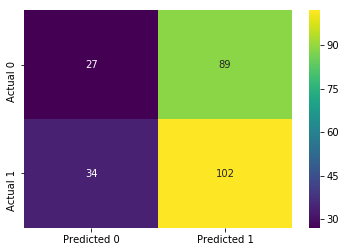

In [0]:
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

plot_confusion_matrix(y_val, y_pred);

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.23      0.31       116
           1       0.53      0.75      0.62       136

   micro avg       0.51      0.51      0.51       252
   macro avg       0.49      0.49      0.46       252
weighted avg       0.49      0.51      0.48       252



# Continue to clean and explore your data. Make exploratory visualizations.

In [0]:
# def RSI

In [0]:
# # dUp= delta[delta > 0]
# # dDown= delta[delta < 0]

# # dUp = dUp.reindex_like(delta, fill_value=0)
# # dDown = dDown.reindex_like(delta, fill_value=0)

# # # Get data
# # data = pd.DataReader('AAPL', 'yahoo', start, end)
# # # Get just the close
# # close = data['Adj Close']

# Close = spy['Close']

# # # Get the difference in price from previous step
# # delta = close.diff()

# delta = Close.diff()


# dUp, dDown = delta.copy(), delta.copy()



# # dUp[dUp < 0] = 0
# # dDown[dDown > 0] = 0

# dUp[dUp < 0] = 0
# dDown[dDown > 0] = 0


# spy['dUp'] = dUp
# spy['dDown'] = dDown.abs()
# spy.head()

# spy['dUp'] = spy['dUp'].rolling(14)

# # RolUp = dUp.rolling(14)
# # RolDown = dDown.rolling(14)
# # RolDown = RolDown.abs()

# # RS = RolUp / RolDown

In [0]:
# import pandas.io.data
import pandas as pd
# import datetime
# import matplotlib.pyplot as plt

# # Window length for moving average
# window_length = 14

# # Dates
# start = datetime.datetime(2010, 1, 1)
# end = datetime.datetime(2013, 1, 27)

# # # Get data
# # data = pd.DataReader('AAPL', 'yahoo', start, end)
# # # Get just the close
# # close = data['Adj Close']

Close = spy['Close']

# # Get the difference in price from previous step
# delta = close.diff()

delta = Close.diff()

# # Get rid of the first row, which is NaN since it did not have a previous 
# # row to calculate the differences
delta = delta[1:] 

# # Make the positive gains (up) and negative gains (down) Series
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0

# # Calculate the EWMA
# roll_up1 = pandas.stats.moments.ewma(up, window_length)
# roll_down1 = pandas.stats.moments.ewma(down.abs(), window_length)

# roll_up1 = up.ewm(14)
# roll_down1 = down.ewm(14)

# roll_up1,roll_down1

spy['Roll_Up'] = up
spy['Roll_Down'] = down.abs()

spy['Roll_Up'] = spy['Roll_Up'].ewm(com=14).mean()
spy['Roll_Down'] = spy['Roll_Down'].ewm(com=14).mean()

# spy.tail()

# # Calculate the RSI based on EWMA
# RS1 = roll_up1 / roll_down1
# RSI1 = 100.0 - (100.0 / (1.0 + RS1))

RS1 = spy['Roll_Up'] / spy['Roll_Down']
RSI1 = 100.0 - (100.0 / (1.0 + RS1))

spy['RSI'] = RSI1
# spy.tail()

# # Calculate the SMA
# roll_up2 = pandas.rolling_mean(up, window_length)
# roll_down2 = pandas.rolling_mean(down.abs(), window_length)

# # Calculate the RSI based on SMA
# RS2 = roll_up2 / roll_down2
# RSI2 = 100.0 - (100.0 / (1.0 + RS2))

# # Compare graphically
# plt.figure()
# RSI1.plot()
# RSI2.plot()
# plt.legend(['RSI via EWMA', 'RSI via SMA'])
# plt.show()
# up.head()

spy.tail()

,Date,Close,Volume,Year,SMA,Above_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,RSI
3196,2017-11-06,258.85,49529148,2017,256.870714,1,1,0.453531,0.178283,71.782366
3197,2017-11-07,258.67,57218448,2017,257.081429,1,0,0.423295,0.178397,70.350758
3198,2017-11-08,259.11,50277699,2017,257.318571,1,1,0.424409,0.166504,71.822566
3199,2017-11-09,258.17,94537282,2017,257.394286,1,0,0.396115,0.218071,64.494358
3200,2017-11-10,258.09,59862364,2017,257.535714,1,0,0.369707,0.208866,63.899844


In [0]:
spy['Overbought'] = spy['RSI'] > 70.0
spy['Oversold'] = spy['RSI'] < 30.0

In [0]:
spy.head()

,Date,Close,Volume,Year,SMA,Above_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,RSI,Overbought,Oversold
0,2005-02-25,105.79,70221808,2005,NaN,1,n,NaN,NaN,NaN,False,False
1,2005-02-28,105.08,79695344,2005,NaN,1,0,0.000000,0.710000,0.000000,False,True
2,2005-03-01,105.62,54607412,2005,NaN,1,1,0.279310,0.342759,44.900222,False,False
3,2005-03-02,105.57,73733090,2005,NaN,1,0,0.179715,0.238368,42.985482,False,False
4,2005-03-03,105.61,71286823,2005,NaN,1,1,0.141093,0.172474,44.996003,False,False


In [0]:
# delta.head()

In [0]:
# spy.head()

In [0]:
spy_2017 = spy[spy['Year'] == 2017]
spy_2016 = spy[spy['Year'] == 2016]
spy_2015 = spy[spy['Year'] == 2015]
spy_2014 = spy[spy['Year'] == 2014]
spy_2013 = spy[spy['Year'] == 2013]
spy_2012 = spy[spy['Year'] == 2012]
spy_2011 = spy[spy['Year'] == 2011]
spy_2010 = spy[spy['Year'] == 2010]
spy_2009 = spy[spy['Year'] == 2009]
spy_2008 = spy[spy['Year'] == 2008]
spy_2007 = spy[spy['Year'] == 2007]
spy_2006 = spy[spy['Year'] == 2006]
spy_2005 = spy[spy['Year'] == 2005]

In [0]:
spy_2010_2013 = pd.concat([spy_2010,spy_2011,spy_2012,spy_2013])

In [0]:
target = ['Close_Higher_Than_Yesterday']
drop = ['Date','Year','SMA','Volume','Close','Roll_Up','Roll_Down']


train = spy_2010_2013.drop(columns=drop)
test = spy_2015.drop(columns=drop)
val = spy_2016.drop(columns=drop)

X_val = val.drop(columns=target)
y_val = val[target]

X_test = test.drop(columns=target)
y_test = test[target]

X_train = train.drop(columns=target)
y_train = train[target]

In [0]:
X_test.head()

,Above_14D_SMA_Yesterday,RSI,Overbought,Oversold
2479,1,52.606022,False,False
2480,1,42.909503,False,False
2481,0,39.013365,False,False
2482,0,45.876155,False,False
2483,0,54.064304,False,False


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [0]:
pipeline = make_pipeline(
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

C:\Users\Sarmen\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Validation Accuracy 0.6031746031746031


# Fit a model. Does it beat your baseline?

# Share at least 1 visualization on Slack.